##**Diabetes Patients**

**Description:**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes
based on certain diagnostic measurements included in the dataset.

In [ ]:
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the Dataset

df=pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#rows are 768 and columns are 9

df.shape

(768, 9)

In [ ]:
#describing numerical columns of dataset

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#checking datatype of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#checking null values are presernt or not

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#checking if any duplicate values are present or not

df.duplicated().sum()

0

<Axes: title={'center': 'Distribution of BMI'}, xlabel='BMI', ylabel='Density'>

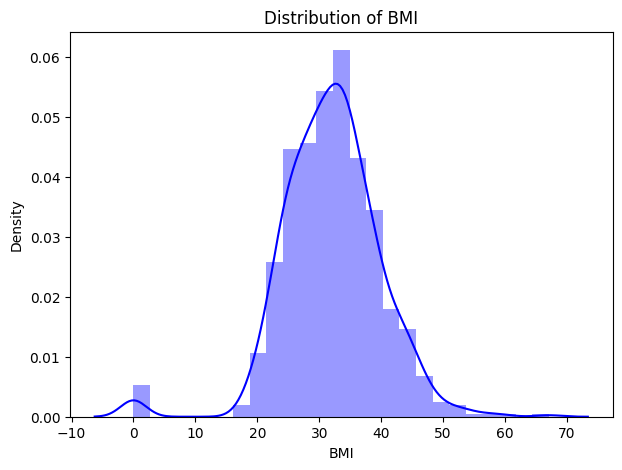

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Distribution of BMI")
sns.distplot(df['BMI'],bins=25,color='blue')

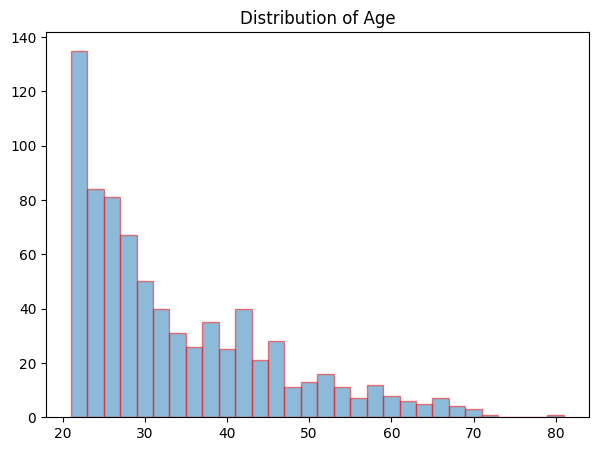

In [ ]:
plt.figure(figsize=(7,5))
plt.title('Distribution of Age')
plt.hist(df['Age'],bins=30,alpha=0.5,edgecolor='red')
plt.show()

<Axes: title={'center': 'Outcome'}, xlabel='Outcome', ylabel='count'>

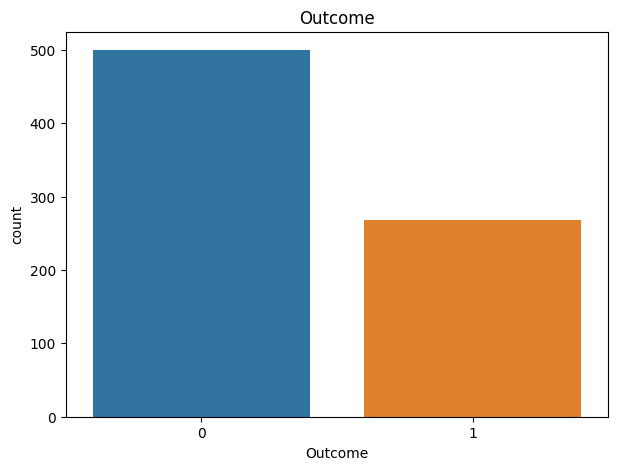

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Outcome")
sns.countplot(data=df,x='Outcome')

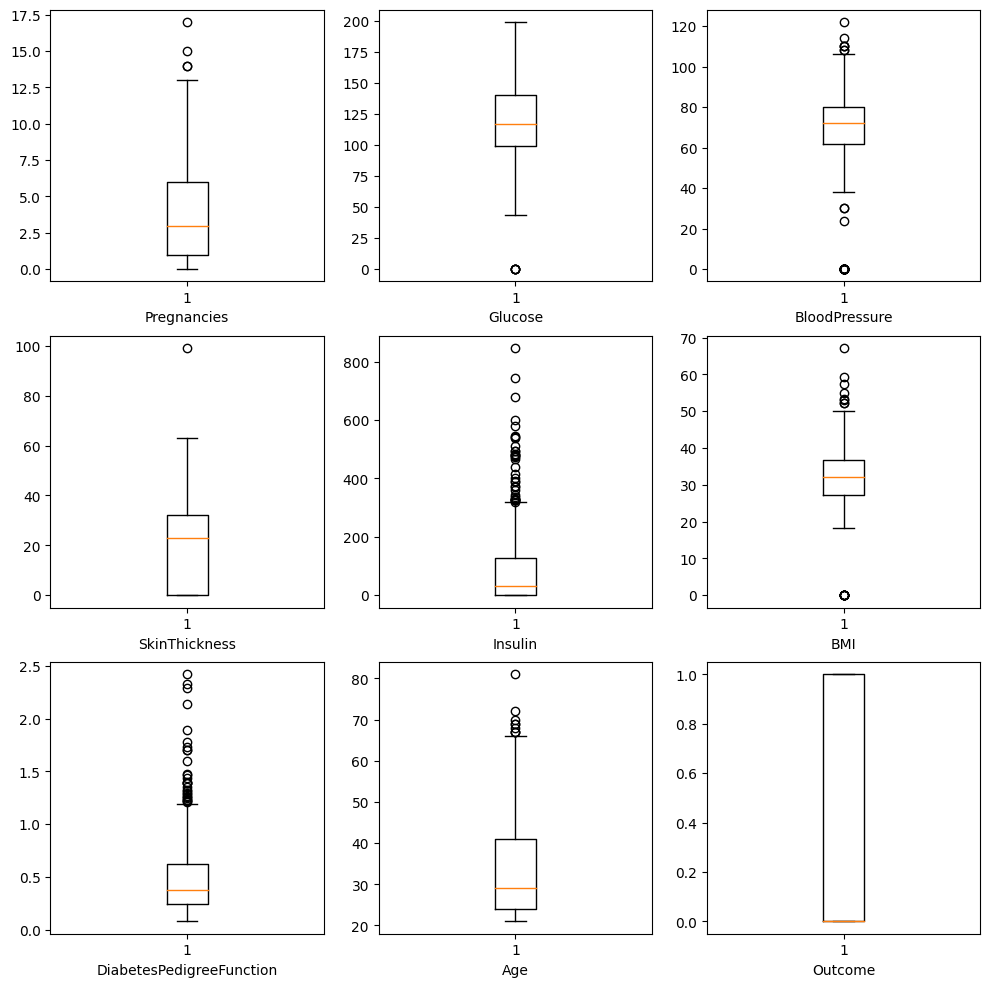

In [ ]:
plt.figure(figsize=(12,12))
for i, column in enumerate(df,1):
    plt.subplot(3,3,i)
    plt.boxplot(df[column])
    plt.xlabel(column)

<Axes: >

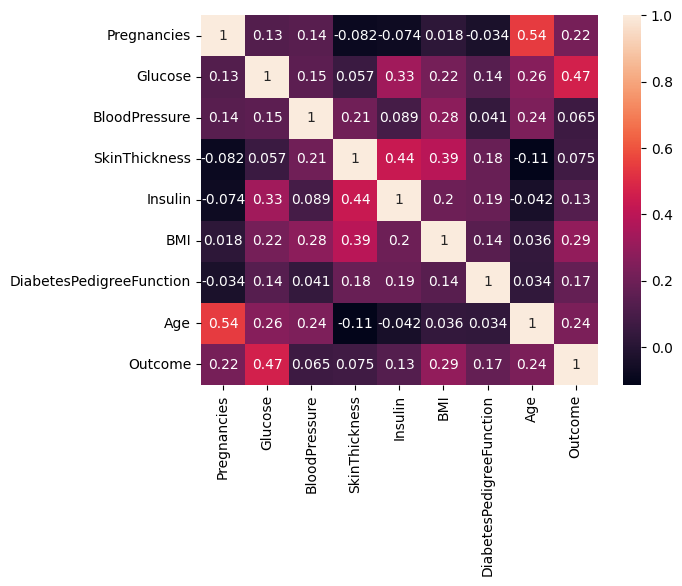

In [ ]:
a=df.corr()
sns.heatmap(a,annot=True)

#**Model Selection**

In [ ]:
#assining variables

x=df.drop(['Outcome'],axis=1)
y=df['Outcome']

#split the data set into train and test data i.e 80:20

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [ ]:
#transforming into standardscaler

sc=preprocessing.StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)
y_train=y_train.ravel()

#**Model Building**

In [ ]:
data={'Model Name':[],'Accuracy':[]}
df1=pd.DataFrame(data)

###**Logisticregression model**

In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc_gb=(100*accuracy_score(y_test,y_pred))
df2={'Model Name':'LogisticRegression','Accuracy':acc_gb}
df1=df1.append(df2,ignore_index=True)

###**DecisionTreeClassifier using gini criterion**

In [ ]:
tree=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=2)
tree.fit(x_train,y_train)
y_pred1=tree.predict(x_test)
acc_gb=(100*accuracy_score(y_test,y_pred1))
df2={'Model Name':'DecisionTreeClassifier gini','Accuracy':acc_gb}
df1=df1.append(df2,ignore_index=True)

###**DecisionTreeClassifier using entropy criterion**

In [ ]:
tree=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=2)
tree.fit(x_train,y_train)
y_pred2=tree.predict(x_test)
acc_gb=(100*accuracy_score(y_test,y_pred2))
df2={'Model Name':'DecisionTreeClassifier entropy','Accuracy':acc_gb}
df1=df1.append(df2,ignore_index=True)

### **GaussianNB**

In [ ]:
gb=GaussianNB()
gb.fit(x_train,y_train)
y_pred3=gb.predict(x_test)
acc_gb=(100*accuracy_score(y_test,y_pred3))
df2={'Model Name':'GaussianNB','Accuracy':acc_gb}
df1=df1.append(df2,ignore_index=True)

###**RandomForest Classifier**

In [ ]:
random_clf=RandomForestClassifier(random_state=2,max_depth=2)
random_clf.fit(x_train,y_train)
y_pred4=random_clf.predict(x_test)
acc_gb=(100*accuracy_score(y_test,y_pred4))
df2={'Model Name':'RandomForestClassifier','Accuracy':acc_gb}
df1=df1.append(df2,ignore_index=True)

In [ ]:
df1

,Model Name,Accuracy
0,LogisticRegression,76.623377
1,DecisionTreeClassifier gini,75.324675
2,DecisionTreeClassifier entropy,73.376623
3,GaussianNB,75.974026
4,RandomForestClassifier,78.571429


Text(107.22222222222227, 0.5, 'Predict label')

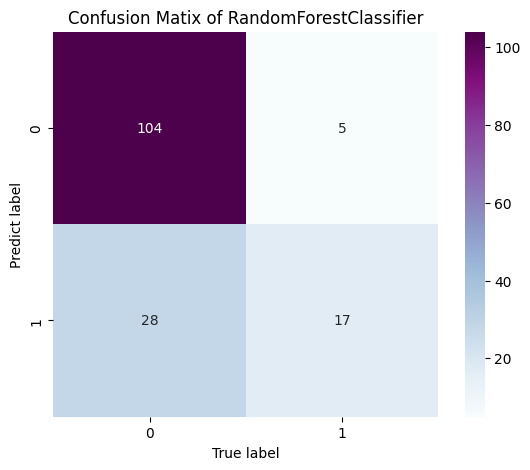

In [ ]:
plt.figure(figsize=(7,5))
cf_random=confusion_matrix(y_test,y_pred4)
sns.heatmap(cf_random,annot=True,square=True,cmap='BuPu',fmt='d')
plt.title("Confusion Matix of RandomForestClassifier")
plt.xlabel('True label')
plt.ylabel('Predict label')

##**Result:**The more accuracy comes from RandomForestClassifier. It gives 78.15% accuracy.